<Step1.탐색> : 데이터의 기초 정보 살펴보기

[Chipotle 데이터셋의 기본 정보]

In [1]:
#pandas 모듈 임포트
import pandas as pd
#read_csv() 함수로 데이터를 Dataframe 형태로 불러옵니다.
#pd.read_csv("파일경로를 포함한 파일명",sep="구분자")
#raw data를 상대 경로로 불러오기
file_path = '../data/chipotle.tsv'
chipo = pd.read_csv(file_path, sep="\t")

print(chipo.shape)

(4622, 5)


In [2]:
#데이터 프레임의 행과 열의 정보 출력
print(chipo.shape)
print("---------------------------------")
print(chipo.info())

(4622, 5)
---------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


In [3]:
#chipo 라는 Dataframe에서 순서대로 10개의 row데이터를 보여줍니다.
#head() 함수에 인수를 생략하면 기본5개의 데이터를 보여줌
chipo.head(10)
print("---------------------------------")
chipo.tail(10)

---------------------------------


,order_id,quantity,item_name,choice_description,item_price
4612,1831,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$9.25
4613,1831,1,Chips,NaN,$2.15
4614,1831,1,Bottled Water,NaN,$1.50
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
4616,1832,1,Chips and Guacamole,NaN,$4.45
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


In [4]:
print(chipo.columns)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


In [5]:
#columns() 함수로 컬럼의 정보를 보여줌
print(chipo.columns)
print("---------------------------------")
print(chipo.index)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
---------------------------------
RangeIndex(start=0, stop=4622, step=1)


[Chipotle 데이터셋의 수치적 특징 파악]
quantity 와 itme_price의 요약 통계
describe() 함수로 요약 통계량 출력하기

In [6]:
# order_id는 숫자의 의미를 가지지 않기 때문에 str으로 변환합니다.
chipo['order_id'] = chipo['order_id'].astype(str)
#chipo dataframe에서 수치형 피처들의 요약 통계량을 확인합니다. 
chipo.describe()
#unipue 함수로 범주형 피쳐의 개수 출력하기

,quantity
count,4622.000000
mean,1.075725
std,0.410186
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,15.000000


In [7]:
#unipue 함수로 범주형 피쳐의 개수 출력하기
#order_id의 개수를 출력
len(chipo['order_id'].unique())

1834

In [8]:
#item_name의 개수를 출력
len(chipo['item_name'].unique())

50

In [9]:
#가장 많이 주문한 item :top 10을 출력합니다. 
item_count = chipo['item_name'].value_counts()[:10]
for idx, (val, cnt) in enumerate(item_count.iteritems(), 1):
    print("Top", idx,":", val, cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Steak Bowl 211
Top 7 : Chips 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


In [10]:
order_count = chipo.groupby('item_name')['order_id'].count()
order_count[:10]

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

[item당 주문 개수와 총량 구하기]

In [11]:
#item당 주문 개수를 출력합니다.
#groupby()함수는 데이터 프레임에서 특정 피처를 기준으로 그룹을 생성하여 이를 통해 그룹별 연산 적용
order_count = chipo.groupby('item_name')['order_id'].count()
order_count [:10]

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [12]:
#item당 주문 총량을 출력합니다.
item_quantity= chipo.groupby('item_name')['quantity'].sum()
item_quantity[:10]#상위 10개의 item당 주문 총량을 출력합니다.

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

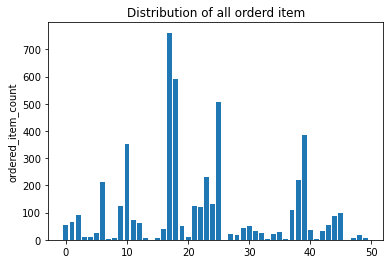

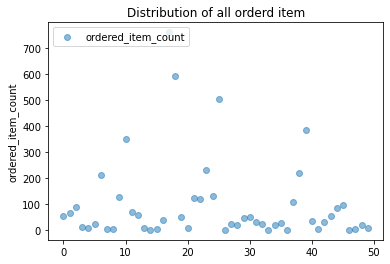

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#아이템별 주문의 총량을 막대 그래프로 시각화
item_name_list = item_quantity.index.tolist()

#numpy.arrange(시작, 끝, 간격)로 배열 생성
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()
#bar()는 막대 그래프를 출력해주는 함수
plt.bar(x_pos,order_cnt,align='center')
plt.ylabel('ordered_item_count')
plt.title('Distribution of all orderd item')

plt.show()

plt.scatter(x_pos,order_cnt,alpha=0.5, label='ordered_item_count')
plt.ylabel('ordered_item_count')
plt.legend(loc = 'upper left')
plt.title('Distribution of all orderd item')

plt.show()


In [14]:
chipo['item_name'].value_counts()[:10]

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Steak Bowl                      211
Chips                           211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64

In [15]:
type(chipo['item_name'].value_counts()[:10])

pandas.core.series.Series

In [16]:
chipo['item_name'].unique()[:10]

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos'], dtype=object)

In [17]:
type(chipo['item_name'].unique().tolist())

list

In [18]:
chipo['item_name'].unique().tolist()

['Chips and Fresh Tomato Salsa',
 'Izze',
 'Nantucket Nectar',
 'Chips and Tomatillo-Green Chili Salsa',
 'Chicken Bowl',
 'Side of Chips',
 'Steak Burrito',
 'Steak Soft Tacos',
 'Chips and Guacamole',
 'Chicken Crispy Tacos',
 'Chicken Soft Tacos',
 'Chicken Burrito',
 'Canned Soda',
 'Barbacoa Burrito',
 'Carnitas Burrito',
 'Carnitas Bowl',
 'Bottled Water',
 'Chips and Tomatillo Green Chili Salsa',
 'Barbacoa Bowl',
 'Chips',
 'Chicken Salad Bowl',
 'Steak Bowl',
 'Barbacoa Soft Tacos',
 'Veggie Burrito',
 'Veggie Bowl',
 'Steak Crispy Tacos',
 'Chips and Tomatillo Red Chili Salsa',
 'Barbacoa Crispy Tacos',
 'Veggie Salad Bowl',
 'Chips and Roasted Chili-Corn Salsa',
 'Chips and Roasted Chili Corn Salsa',
 'Carnitas Soft Tacos',
 'Chicken Salad',
 'Canned Soft Drink',
 'Steak Salad Bowl',
 '6 Pack Soft Drink',
 'Chips and Tomatillo-Red Chili Salsa',
 'Bowl',
 'Burrito',
 'Crispy Tacos',
 'Carnitas Crispy Tacos',
 'Steak Salad',
 'Chips and Mild Fresh Tomato Salsa',
 'Veggie Soft 